In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Initial Analysis to see if foreign success predictions will work

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [2]:
################## Make it this way (the fast way) for the blog post
# load data into list of lists and then put it into pandas
##################

allFiles = glob.glob("/Users/williamcosby/Documents/metis/Project_Luther/movie_*.csv")
movie_data = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
movie_data_raw = pd.concat(list_)

In [3]:
# movie_data_2015_2016 = pd.read_csv('movie_data_2015_2016.csv')

In [4]:
movie_data_raw.head()

,MOVIE_NAME,DOMESTIC_OPENING,FOREIGN_TOTAL,BUDGET,GENRE,RELEASE_DATE
0,Marvel's The Avengers,207438708,896200000,220000000.0,Action / Adventure,2012-05-04 00:00:00
1,The Dark Knight Rises,160887295,636800000,250000000.0,Action Thriller,2012-07-20 00:00:00
2,The Hunger Games,152535747,286384032,78000000.0,Action / Adventure,2012-03-23 00:00:00
3,Skyfall,88364714,804200736,200000000.0,Action,2012-11-09 00:00:00
4,The Hobbit:An Unexpected Journey,84617303,718100000,0.0,Fantasy,2012-12-14 00:00:00


# Set the index to the movie name (dont need it in the analysis)

In [5]:
movie_data_raw = movie_data_raw.set_index(['MOVIE_NAME'])

# Read in director, writer, actor, and producer information

In [6]:
director_data_raw = pd.read_csv('/Users/williamcosby/Documents/metis/Project_Luther/director_data.csv')
actor_data_raw = pd.read_csv('/Users/williamcosby/Documents/metis/Project_Luther/actor_data.csv')
writer_data_raw = pd.read_csv('/Users/williamcosby/Documents/metis/Project_Luther/writer_data.csv')
producer_data_raw = pd.read_csv('/Users/williamcosby/Documents/metis/Project_Luther/producer_data.csv')

In [7]:
producer_data_raw.head(5)

,MOVIE_NAME,PRODUCER
0,Finding Dory,Thomas Newman
1,Captain America:Civil War,Kevin Feige
2,Captain America:Civil War,Henry Jackman
3,Deadpool,Lauren Schuler Donner
4,Deadpool,Simon Kinberg


### make the movie name the index

In [8]:
director_data = director_data_raw.set_index(['MOVIE_NAME'])
writer_data = writer_data_raw.set_index(['MOVIE_NAME'])
actor_data = actor_data_raw.set_index(['MOVIE_NAME'])
producer_data = producer_data_raw.set_index(['MOVIE_NAME'])

In [9]:
director_data.head(5)

,DIRECTOR
MOVIE_NAME,
Finding Dory,Andrew Stanton
Captain America:Civil War,Anthony Russo
Captain America:Civil War,Joe Russo
The Jungle Book (2016),Jon Favreau
Zootopia,Rich Moore


In [10]:
actor_data.head(5)

,ACTOR
MOVIE_NAME,
Finding Dory,Ellen DeGeneres
Finding Dory,Albert Brooks
Finding Dory,Ty Burrell*
Finding Dory,Diane Keaton*
Finding Dory,Idris Elba*


In [11]:
writer_data.head(5)

,WRITER
MOVIE_NAME,
Finding Dory,Andrew Stanton
Captain America:Civil War,Christopher Markus
Captain America:Civil War,Stephen McFeely
Deadpool,Rhett Reese
Deadpool,Paul Wernick


In [12]:
producer_data.head(5)

,PRODUCER
MOVIE_NAME,
Finding Dory,Thomas Newman
Captain America:Civil War,Kevin Feige
Captain America:Civil War,Henry Jackman
Deadpool,Lauren Schuler Donner
Deadpool,Simon Kinberg


### Vectorize the director data

In [13]:
def vectorize_director(row):
    row[row['DIRECTOR']] = 1
    return pd.Series(row)
def vectorize_writer(row):
    row[row['WRITER']] = 1
    return pd.Series(row)
def vectorize_producer(row):
    row[row['PRODUCER']] = 1
    return pd.Series(row)
def vectorize_actor(row):
    row[row['ACTOR']] = 1
    return pd.Series(row)

In [14]:
director_data = director_data.apply(vectorize_director,axis=1).fillna(0)
writer_data = writer_data.apply(vectorize_writer,axis=1).fillna(0)
producer_data = producer_data.apply(vectorize_producer,axis=1).fillna(0)
actor_data = actor_data.apply(vectorize_actor,axis=1).fillna(0)

In [15]:
# drop the original column that still has the names

director_data.drop(['DIRECTOR'],inplace=True)
actor_data.drop(['ACTOR'],inplace=True)
producer_data.drop(['PRODUCER'],inplace=True)
writer_data.drop(['WRITER'],inplace=True)


## Collapse the rows onto eachother if they are the same movie (so each movie is only in there once)

In [16]:
director_data_collapsed = director_data.groupby(director_data.index).sum()
actor_data_collapsed = actor_data.groupby(actor_data.index).sum()
writer_data_collapsed = writer_data.groupby(writer_data.index).sum()
producer_data_collapsed = producer_data.groupby(producer_data.index).sum()

## Want to multiply every value in each column by the sum of that column...this represents the director's experience

In [17]:
def sum_exp(row):
    row = row*row.sum(axis=0)
    return pd.Series(row)

In [18]:
director_data_transpose = director_data_collapsed.transpose()
director_data_transpose_summed = director_data_transpose.apply(sum_exp,axis=1)
director_data = director_data_transpose_summed.transpose()
# director_data.head(10)

actor_data_transpose = actor_data_collapsed.transpose()
actor_data_transpose_summed = actor_data_transpose.apply(sum_exp,axis=1)
actor_data = actor_data_transpose_summed.transpose()

writer_data_transpose = writer_data_collapsed.transpose()
writer_data_transpose_summed = writer_data_transpose.apply(sum_exp,axis=1)
writer_data = writer_data_transpose_summed.transpose()

producer_data_transpose = producer_data_collapsed.transpose()
producer_data_transpose_summed = producer_data_transpose.apply(sum_exp,axis=1)
producer_data = producer_data_transpose_summed.transpose()

In [19]:
director_data['DIRECTOR_EXP'] = director_data.sum(axis=1)
director_experience = director_data['DIRECTOR_EXP']
director_experience = director_experience.to_frame('DIRECTOR_EXP')

actor_data['ACTOR_EXP'] = actor_data.sum(axis=1)
actor_experience = actor_data['ACTOR_EXP']
actor_experience = actor_experience.to_frame('ACTOR_EXP')

producer_data['PRODUCER_EXP'] = producer_data.sum(axis=1)
producer_experience = producer_data['PRODUCER_EXP']
producer_experience = producer_experience.to_frame('PRODUCER_EXP')

writer_data['WRITER_EXP'] = writer_data.sum(axis=1)
writer_experience = writer_data['WRITER_EXP']
writer_experience = writer_experience.to_frame('WRITER_EXP')

In [20]:
director_experience.describe()

,DIRECTOR_EXP
count,1147.00000
mean,2.51177
std,1.44068
min,1.00000
25%,1.00000
50%,2.00000
75%,3.00000
max,8.00000


In [21]:
actor_experience.describe()

,ACTOR_EXP
count,1639.000000
mean,28.258694
std,21.533067
min,1.000000
25%,12.000000
50%,23.000000
75%,40.000000
max,182.000000


# Now need to merge the datasets

In [22]:
direct_act_joined = director_experience.join(actor_experience)
direct_act_prod_joined = direct_act_joined.join(producer_experience)
full_people_joined = direct_act_prod_joined.join(writer_experience)

In [23]:
full_people_joined.head()

,DIRECTOR_EXP,ACTOR_EXP,PRODUCER_EXP,WRITER_EXP
MOVIE_NAME,,,,
10 Years,1.0,99.0,14.0,2.0
11-11-11,1.0,NaN,NaN,1.0
12 Years a Slave,2.0,95.0,72.0,3.0
127 Hours,3.0,23.0,5.0,5.0
13 Hours:The Secret Soldiers of Benghazi,4.0,8.0,NaN,NaN


# Merge people data with the full dataset

In [24]:
movie_data_raw = movie_data_raw.join(full_people_joined)

# Find number of movies that have foreign gross info

In [25]:
movie_data_raw.columns

Index([u'DOMESTIC_OPENING', u'FOREIGN_TOTAL', u'BUDGET', u'GENRE',
       u'RELEASE_DATE', u'DIRECTOR_EXP', u'ACTOR_EXP', u'PRODUCER_EXP',
       u'WRITER_EXP'],
      dtype='object')

In [26]:
# total number of movies
movie_data_raw.shape

(4256, 9)

In [27]:
# movies with foreign earnings information
movie_data_raw[movie_data_raw['FOREIGN_TOTAL']!=0].shape

(1528, 9)

# Subset to get just the movies with foreign earnings information

In [28]:
movie_data = movie_data_raw[movie_data_raw['FOREIGN_TOTAL']!=0]

In [29]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1528 entries, '71 to [Rec] 2
Data columns (total 9 columns):
DOMESTIC_OPENING    1528 non-null int64
FOREIGN_TOTAL       1528 non-null int64
BUDGET              1527 non-null float64
GENRE               1528 non-null object
RELEASE_DATE        1528 non-null object
DIRECTOR_EXP        883 non-null float64
ACTOR_EXP           810 non-null float64
PRODUCER_EXP        762 non-null float64
WRITER_EXP          711 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 119.4+ KB


# Start some analysis

## Combine the genres so they arent "action / adventure"

In [30]:
def split_genres(row):
    genres=[]
    if '/' in row['GENRE']:
        genres = row['GENRE'].split('/')
    else:
        genres = row['GENRE'].split()
    for genre in genres:
        # need to strip the whitespace off the columns to avoid things like 'Action' and 'Action '
        row[genre.strip()] = 1
    return pd.Series(row)

In [31]:
movie_data_split = movie_data.apply(split_genres,axis=1)

In [32]:
movie_data_split.head(3)

,ACTOR_EXP,Action,Adventure,Animation,BUDGET,Comedy,Concert,Crime,DIRECTOR_EXP,DOMESTIC_OPENING,...,Period,RELEASE_DATE,Romance,Romantic,Sci-Fi,Sports,Thriller,WRITER_EXP,War,Western
MOVIE_NAME,,,,,,,,,,,,,,,,,,,,,
'71,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,55761,...,NaN,2015-02-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
10 Cloverfield Lane,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24727437,...,NaN,2016-03-11 00:00:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
11-11-11,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,32771,...,NaN,2011-11-11 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


## Now fill in the missing values with 0


In [33]:
movie_data = movie_data_split.fillna(0)

## Need to drop the 'GENRE' column now

In [34]:
movie_data.drop(['GENRE'],axis=1,inplace=True)

In [35]:
movie_data.columns

Index([u'ACTOR_EXP', u'Action', u'Adventure', u'Animation', u'BUDGET',
       u'Comedy', u'Concert', u'Crime', u'DIRECTOR_EXP', u'DOMESTIC_OPENING',
       u'Documentary', u'Drama', u'FOREIGN_TOTAL', u'Family', u'Fantasy',
       u'Foreign', u'Historical', u'Horror', u'IMAX', u'Music', u'Musical',
       u'PRODUCER_EXP', u'Period', u'RELEASE_DATE', u'Romance', u'Romantic',
       u'Sci-Fi', u'Sports', u'Thriller', u'WRITER_EXP', u'War', u'Western'],
      dtype='object')

In [36]:
movie_data.head(2)

,ACTOR_EXP,Action,Adventure,Animation,BUDGET,Comedy,Concert,Crime,DIRECTOR_EXP,DOMESTIC_OPENING,...,Period,RELEASE_DATE,Romance,Romantic,Sci-Fi,Sports,Thriller,WRITER_EXP,War,Western
MOVIE_NAME,,,,,,,,,,,,,,,,,,,,,
'71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55761,...,0.0,2015-02-27 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10 Cloverfield Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24727437,...,0.0,2016-03-11 00:00:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Will want to encode the dates as 1st quarter, 2nd quarter, 3rd quarter, 4th quarter
#### Do this by first transforming the column into strings "1","2","3","4", then apply pandas .get_dummies to make it one-hot

In [37]:
from pandas import DatetimeIndex
import dateutil.parser

In [38]:
# turn RELEASE_DATE into actual datetime
movie_data['RELEASE_DATE'] = movie_data['RELEASE_DATE'].apply(lambda x: dateutil.parser.parse(x))

In [39]:
movie_data['RELEASE_DATE'].dtype

dtype('<M8[ns]')

In [40]:
movie_data["RELEASE_QUARTER"] = movie_data["RELEASE_DATE"].apply(lambda x: x.quarter)

In [41]:
# now just want release quarter
movie_data.drop(['RELEASE_DATE'],axis=1,inplace=True)

#### Now vectorize release quarter column

In [42]:
movie_data = pd.get_dummies(movie_data,columns=["RELEASE_QUARTER"])

In [43]:
movie_data.head()

,ACTOR_EXP,Action,Adventure,Animation,BUDGET,Comedy,Concert,Crime,DIRECTOR_EXP,DOMESTIC_OPENING,...,Sci-Fi,Sports,Thriller,WRITER_EXP,War,Western,RELEASE_QUARTER_1,RELEASE_QUARTER_2,RELEASE_QUARTER_3,RELEASE_QUARTER_4
MOVIE_NAME,,,,,,,,,,,,,,,,,,,,,
'71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55761,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10 Cloverfield Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24727437,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11-11-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32771,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12 Years a Slave,95.0,0.0,0.0,0.0,20000000.0,0.0,0.0,0.0,2.0,7599446,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
127 Hours,23.0,0.0,0.0,0.0,18000000.0,0.0,0.0,0.0,3.0,2401652,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0


# Check the data for missing values, and other weird things

## Impute what I can into the raw data

### Check Domestic Openings

In [44]:
len(movie_data[movie_data["DOMESTIC_OPENING"] == 0])

0

## Check Budget 

In [45]:
# woah...missing a lot~~
len (movie_data[movie_data['BUDGET'] == 0])

774

In [46]:
movie_no_budget = movie_data[movie_data['BUDGET'] == 0]

In [47]:
movie_no_budget.head(10)

,ACTOR_EXP,Action,Adventure,Animation,BUDGET,Comedy,Concert,Crime,DIRECTOR_EXP,DOMESTIC_OPENING,...,Sci-Fi,Sports,Thriller,WRITER_EXP,War,Western,RELEASE_QUARTER_1,RELEASE_QUARTER_2,RELEASE_QUARTER_3,RELEASE_QUARTER_4
MOVIE_NAME,,,,,,,,,,,,,,,,,,,,,
'71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55761,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10 Cloverfield Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24727437,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11-11-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32771,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
13 Assassins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17 Girls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2 Days in New York,11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,23942,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
"20,000 Days on Earth",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3 (2011),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Note!!!!!! one reason for weird domest/foreign offset is if a movie is released somewhere like korea...it might do super well there but not well in america (which is considered domestic)

# Have option of ignoring films with foreign as the genre

In [48]:
movies_no_domestic = movie_data[movie_data["DOMESTIC_OPENING"] == 0]

In [49]:
movies_no_domestic

,ACTOR_EXP,Action,Adventure,Animation,BUDGET,Comedy,Concert,Crime,DIRECTOR_EXP,DOMESTIC_OPENING,...,Sci-Fi,Sports,Thriller,WRITER_EXP,War,Western,RELEASE_QUARTER_1,RELEASE_QUARTER_2,RELEASE_QUARTER_3,RELEASE_QUARTER_4
MOVIE_NAME,,,,,,,,,,,,,,,,,,,,,


# Just get rid of entries with no budget info

In [50]:
movie_data = movie_data[movie_data['BUDGET'] != 0]

In [51]:
movie_data[movie_data['FOREIGN_TOTAL'] >= 0].shape

(754, 35)

In [52]:
movie_data.shape

(754, 35)

In [53]:
len(movie_data[movie_data['Foreign'] == 1])

9

# Drop foreign movies because 

In [54]:
movie_data = movie_data[movie_data['Foreign'] == 0]

In [55]:
movie_data.shape

(745, 35)

In [56]:
movie_data.columns

Index([u'ACTOR_EXP', u'Action', u'Adventure', u'Animation', u'BUDGET',
       u'Comedy', u'Concert', u'Crime', u'DIRECTOR_EXP', u'DOMESTIC_OPENING',
       u'Documentary', u'Drama', u'FOREIGN_TOTAL', u'Family', u'Fantasy',
       u'Foreign', u'Historical', u'Horror', u'IMAX', u'Music', u'Musical',
       u'PRODUCER_EXP', u'Period', u'Romance', u'Romantic', u'Sci-Fi',
       u'Sports', u'Thriller', u'WRITER_EXP', u'War', u'Western',
       u'RELEASE_QUARTER_1', u'RELEASE_QUARTER_2', u'RELEASE_QUARTER_3',
       u'RELEASE_QUARTER_4'],
      dtype='object')

In [57]:
movie_data['FOREIGN_TOTAL'] = movie_data['FOREIGN_TOTAL']/10000000

In [61]:
movie_data['BUDGET'] = movie_data['BUDGET']/10000000

In [62]:
movie_data['BUDGET'].head(5)

MOVIE_NAME
12 Years a Slave                            2.0
127 Hours                                   1.8
13 Hours:The Secret Soldiers of Benghazi    5.0
2 Guns                                      6.1
21 Jump Street                              4.2
Name: BUDGET, dtype: float64

# Get some plots the data

In [56]:
import sklearn
from sklearn.cross_validation import train_test_split,KFold,cross_val_score
from pandas.tools.plotting import scatter_matrix

### Drop na values (there is apparently 1)

In [57]:
movie_data.dropna(inplace=True)

In [58]:
movie_data.shape

(745, 35)

In [64]:
movie_features,movie_target = movie_data.drop('FOREIGN_TOTAL', axis=1),movie_data['FOREIGN_TOTAL']

In [65]:
movie_features.columns

Index([u'ACTOR_EXP', u'Action', u'Adventure', u'Animation', u'BUDGET',
       u'Comedy', u'Concert', u'Crime', u'DIRECTOR_EXP', u'DOMESTIC_OPENING',
       u'Documentary', u'Drama', u'Family', u'Fantasy', u'Foreign',
       u'Historical', u'Horror', u'IMAX', u'Music', u'Musical',
       u'PRODUCER_EXP', u'Period', u'Romance', u'Romantic', u'Sci-Fi',
       u'Sports', u'Thriller', u'WRITER_EXP', u'War', u'Western',
       u'RELEASE_QUARTER_1', u'RELEASE_QUARTER_2', u'RELEASE_QUARTER_3',
       u'RELEASE_QUARTER_4'],
      dtype='object')

## Want to get some plots...write these to a directory
#### currently without the extra actor/director/writer information...

In [67]:
column_names = list(movie_features.columns)

for column in column_names:
    try:
    #     print movie_features[column]
        # create plots of column vs foreign budget

        ## want to rescale budget and domestic fields to make the graphs look better and be 
        ## easier to understand
        if column == 'BUDGET':
            plt.scatter(movie_features[column],movie_target,alpha=0.2)
        elif column == 'DOMESTIC_OPENING':
            plt.scatter(movie_features[column],movie_target,alpha=0.2)
        else:
            plt.scatter(movie_features[column],movie_target,alpha=0.2)

        plt.xlabel(column)
        plt.ylabel('foreign gross (millions $)')

        path = '/Users/williamcosby/Documents/metis/Project_Luther/plots/adjusted'+str(column)+'.png'
        plt.savefig(path)
        plt.close() 
    except:
        print column
        print movie_features[column]

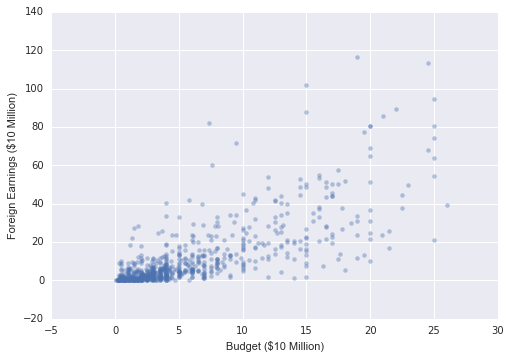

In [116]:
sns.regplot(movie_features['BUDGET'],movie_target,fit_reg=False,scatter_kws={'alpha':0.4})
sns.axlabel('Budget ($10 Million)','Foreign Earnings ($10 Million)')

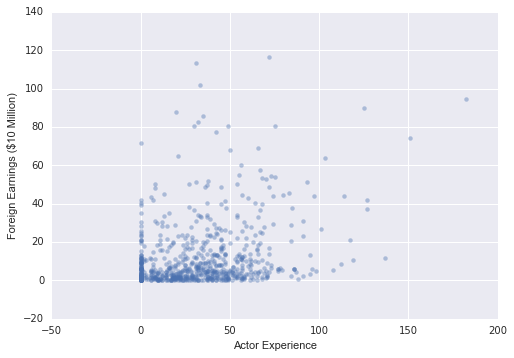

In [117]:
sns.regplot(movie_features['ACTOR_EXP'],movie_target,fit_reg=False,scatter_kws={'alpha':0.4})
sns.axlabel('Actor Experience','Foreign Earnings ($10 Million)')

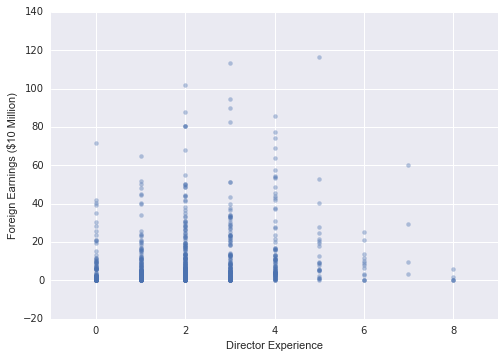

In [118]:
sns.regplot(movie_features['DIRECTOR_EXP'],movie_target,fit_reg=False,scatter_kws={'alpha':0.4})
sns.axlabel('Director Experience','Foreign Earnings ($10 Million)')

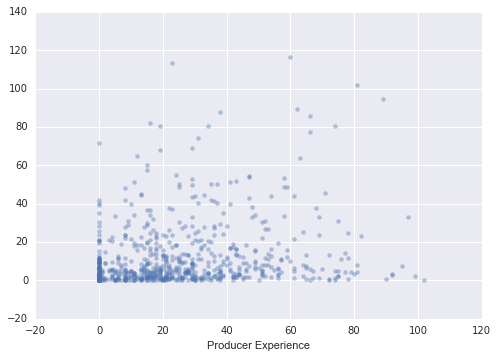

In [119]:
sns.regplot(movie_features['PRODUCER_EXP'],movie_target,fit_reg=False,scatter_kws={'alpha':0.4})
sns.axlabel('Producer Experience','')

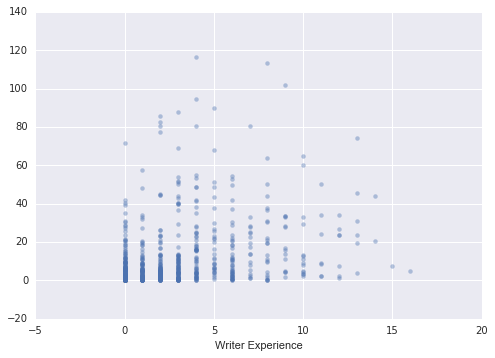

In [120]:
sns.regplot(movie_features['WRITER_EXP'],movie_target,fit_reg=False,scatter_kws={'alpha':0.4})
sns.axlabel('Writer Experience','')

# trying to get a horizontal barplot of genres

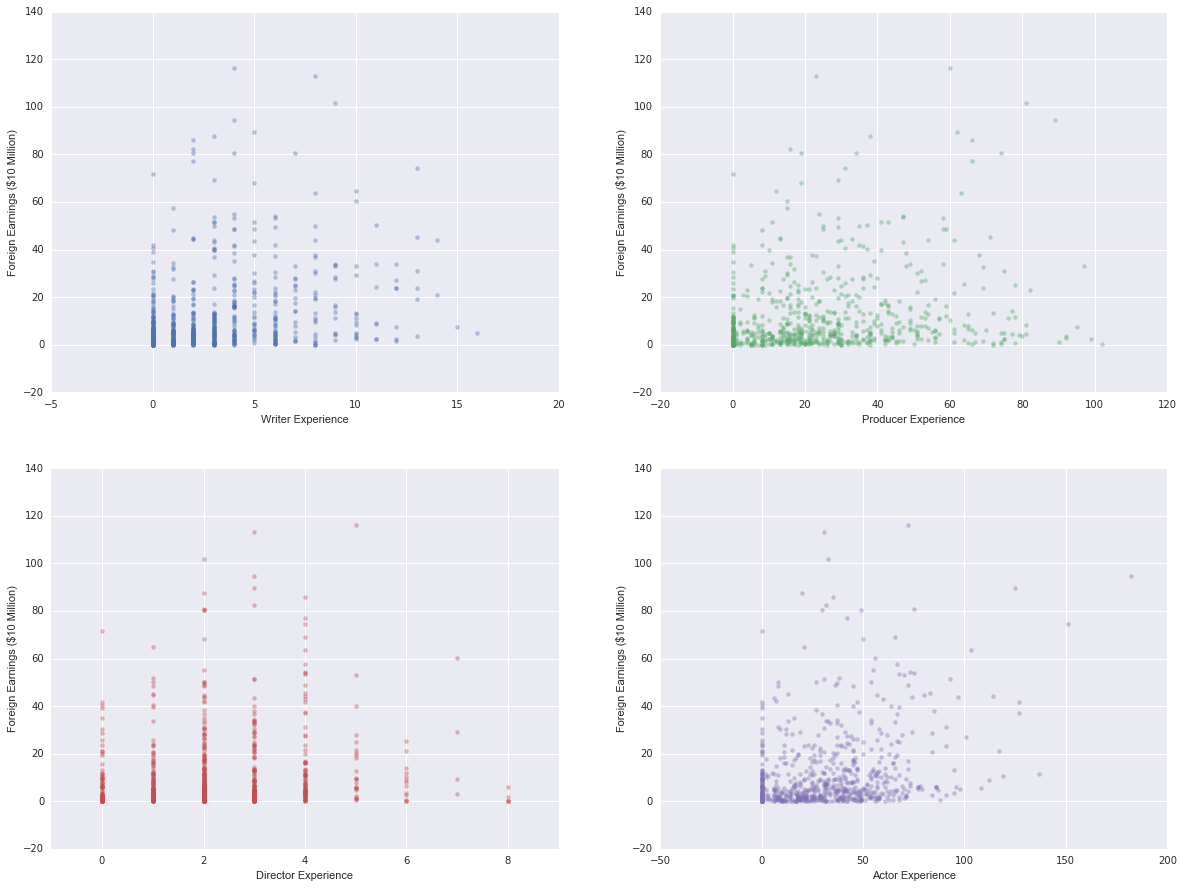

In [155]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)

sns.regplot(movie_features['WRITER_EXP'],movie_target,fit_reg=False,scatter_kws={'alpha':0.4},ax=ax1)
ax1.set_xlabel('Writer Experience')
ax1.set_ylabel('Foreign Earnings ($10 Million)')

sns.regplot(movie_features['PRODUCER_EXP'],movie_target,fit_reg=False,scatter_kws={'alpha':0.4},ax=ax2)
ax2.set_xlabel('Producer Experience')
ax2.set_ylabel('Foreign Earnings ($10 Million)')

sns.regplot(movie_features['DIRECTOR_EXP'],movie_target,fit_reg=False,scatter_kws={'alpha':0.4},ax=ax3)
ax3.set_xlabel('Director Experience')
ax3.set_ylabel('Foreign Earnings ($10 Million)')

sns.regplot(movie_features['ACTOR_EXP'],movie_target,fit_reg=False,scatter_kws={'alpha':0.4},ax=ax4)
ax4.set_xlabel('Actor Experience')
ax4.set_ylabel('Foreign Earnings ($10 Million)')

f.set_size_inches(20,15)

In [162]:
movie_features.columns

Index([u'ACTOR_EXP', u'Action', u'Adventure', u'Animation', u'BUDGET',
       u'Comedy', u'Concert', u'Crime', u'DIRECTOR_EXP', u'DOMESTIC_OPENING',
       u'Documentary', u'Drama', u'Family', u'Fantasy', u'Foreign',
       u'Historical', u'Horror', u'IMAX', u'Music', u'Musical',
       u'PRODUCER_EXP', u'Period', u'Romance', u'Romantic', u'Sci-Fi',
       u'Sports', u'Thriller', u'WRITER_EXP', u'War', u'Western',
       u'RELEASE_QUARTER_1', u'RELEASE_QUARTER_2', u'RELEASE_QUARTER_3',
       u'RELEASE_QUARTER_4'],
      dtype='object')

In [ ]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)

sns.barplot(movie_features['Comedy'],movie_target,ax=ax1)
ax1.set_xlabel('Comedy')
ax1.set_ylabel('Foreign Earnings ($10 Million)')

sns.barplot(movie_features['Action'],movie_target,ax=ax2)
ax2.set_xlabel('Action')
ax2.set_ylabel('Foreign Earnings ($10 Million)')

sns.barplot(movie_features['Horror'],movie_target,ax=ax3)
ax3.set_xlabel('Horror')
ax3.set_ylabel('Foreign Earnings ($10 Million)')

sns.barplot(movie_features['Sports'],movie_target,ax=ax4)
ax4.set_xlabel('Sports')
ax4.set_ylabel('Foreign Earnings ($10 Million)')

f.set_size_inches(20,15)

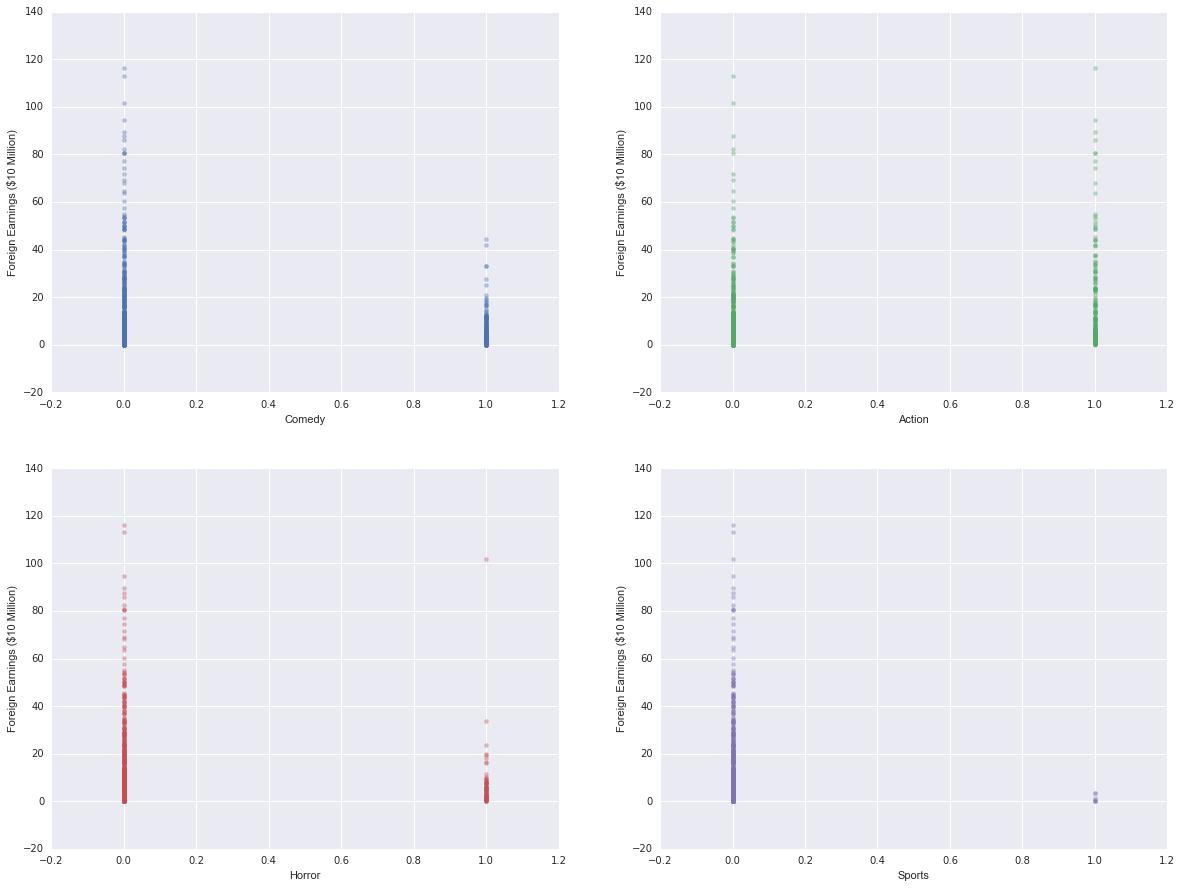

In [166]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)

sns.regplot(movie_features['Comedy'],movie_target,fit_reg=False,scatter_kws={'alpha':0.4},ax=ax1)
ax1.set_xlabel('Comedy')
ax1.set_ylabel('Foreign Earnings ($10 Million)')

sns.regplot(movie_features['Action'],movie_target,fit_reg=False,scatter_kws={'alpha':0.4},ax=ax2)
ax2.set_xlabel('Action')
ax2.set_ylabel('Foreign Earnings ($10 Million)')

sns.regplot(movie_features['Horror'],movie_target,fit_reg=False,scatter_kws={'alpha':0.4},ax=ax3)
ax3.set_xlabel('Horror')
ax3.set_ylabel('Foreign Earnings ($10 Million)')

sns.regplot(movie_features['Sports'],movie_target,fit_reg=False,scatter_kws={'alpha':0.4},ax=ax4)
ax4.set_xlabel('Sports')
ax4.set_ylabel('Foreign Earnings ($10 Million)')

f.set_size_inches(20,15)

# Start some modeling
### Split the data into features and targets



In [68]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_predict, train_test_split,KFold, cross_val_score

# Training, Testing, and holdout splits

#### nh means "not holdout"

### Make a holdout set from the data (dropping domestic opening)

In [69]:
movie_features_nh, movie_features_holdout, movie_target_nh, movie_target_holdout = cross_validation.train_test_split(movie_features.drop(['DOMESTIC_OPENING'],axis=1),movie_target,
                                                            test_size=0.1)

### Now split the data into the train and test sets (within the non-holdout data) and create the model

In [70]:
movie_features_train, movie_features_test, movie_target_train, movie_target_test = cross_validation.train_test_split(
                                                            movie_features_nh,movie_target_nh,
                                                            test_size=0.3)

In [71]:
shuffler = cross_validation.ShuffleSplit(len(movie_features_train),n_iter=10,test_size=0.1)
kfold = KFold(len(movie_features_train),n_folds=10)

## Train lin reg (without domestic opening)

In [72]:
lr_vanilla = linear_model.LinearRegression()
lr_vanilla.fit(movie_features_train,movie_target_train)
print "vanilla lin reg score: ", lr_vanilla.score(movie_features_test, movie_target_test)

# get cross val scores:
scores = cross_val_score(lr_vanilla,movie_features_train,movie_target_train,cv=kfold)
mean_score_lr = np.mean(scores)
print "cross val scores: ",scores
print
print "mean cross vall score: ",mean_score_lr

vanilla lin reg score:  0.556080667355
cross val scores:  [ 0.34286882  0.71950563  0.53541333  0.47877668  0.63191629  0.46452493
  0.62607599  0.52802347  0.58847303  0.57505568]

mean cross vall score:  0.549063383596


# Run on holdout set

In [73]:
# with domestic opening information
# lr_nodom.score(movie_features_holdout, movie_target_holdout)

In [75]:
# without domestic opening information
lr_vanilla.score(movie_features_holdout,movie_target_holdout)

0.64259202441748187

# Random Forest

In [76]:
len(movie_features.columns)

34

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
rf = RandomForestRegressor(n_estimators=1000,max_features=25)
rf.fit(movie_features_train,movie_target_train)
print "Random Forest result with no domestic information: ", rf.score(movie_features_test,movie_target_test)

rf_scores = cross_val_score(rf,movie_features_train,movie_target_train,cv=kfold)
mean_score_rf = np.mean(rf_scores)
print "cross val scores: ", rf_scores
print "mean cross val score: ",mean_score_rf


# rf = RandomForestRegressor(n_estimators=1000,max_features=25)
# rf.fit(movie_features_train,movie_target_train)
# print "Random Forest result with domestic information: ", rf.score(movie_features_test,movie_target_test)



Random Forest result with no domestic information:  0.539672617896
cross val scores:  [ 0.29468253  0.42475195  0.44862063  0.52549835  0.67593707  0.45214994
  0.56569362  0.60517796  0.43036541  0.65448852]
mean cross val score:  0.507736597073


In [79]:
# test on holdout set
score = rf.score(movie_features_holdout, movie_target_holdout)
print "holdout test: ", score

holdout test:  0.682717800355


In [80]:
rf = RandomForestRegressor(n_estimators=1000,max_features=30)
rf.fit(movie_features_train,movie_target_train)
print "Random Forest result with no domestic information: ", rf.score(movie_features_test,movie_target_test)

rf_scores = cross_val_score(rf,movie_features_train,movie_target_train,cv=kfold)
mean_score_rf = np.mean(rf_scores)
print "cross val scores: ", rf_scores
print "mean cross val score: ",mean_score_rf


Random Forest result with no domestic information:  0.535480648192
cross val scores:  [ 0.28203725  0.42343717  0.4297584   0.5352073   0.67676457  0.42933076
  0.54884402  0.59571524  0.42898251  0.64316728]
mean cross val score:  0.499324449841


In [81]:
score = rf.score(movie_features_holdout, movie_target_holdout)
print "holdout test: ", score

holdout test:  0.675167672716


# Gradient Boost

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
grad_boost = GradientBoostingRegressor(n_estimators=200,learning_rate=0.1,alpha=0.3,loss='lad')

grad_boost.fit(movie_features_train,movie_target_train)
grad_boost.score(movie_features_test,movie_target_test)

scores = cross_val_score(grad_boost,movie_features_train,movie_target_train)
print np.mean(scores)

0.499397901474


In [85]:
grad_boost.score(movie_features_holdout, movie_target_holdout)

0.716209742516697

In [86]:
grad_boost_2 = GradientBoostingRegressor(n_estimators=400,learning_rate=0.1,alpha=0.3,loss='lad')

grad_boost_2.fit(movie_features_train,movie_target_train)
grad_boost_2.score(movie_features_test,movie_target_test)

scores_2 = cross_val_score(grad_boost_2,movie_features_train,movie_target_train)
print np.mean(scores)

0.499397901474


In [87]:
grad_boost = GradientBoostingRegressor(n_estimators=200,learning_rate=0.1,alpha=0.3,loss='huber')

grad_boost.fit(movie_features_train,movie_target_train)
grad_boost.score(movie_features_test,movie_target_test)

scores = cross_val_score(grad_boost,movie_features_train,movie_target_train)
print np.mean(scores)

0.493644139103


# Grid Searching Parameters

In [88]:
from sklearn import grid_search

## Linear Regression

In [89]:
models = {}
models['lin_reg'] = linear_model.LinearRegression()
models['ridge'] = linear_model.Ridge()
models['lasso'] = linear_model.Lasso(alpha = 2) # ran this normally...alpha =2 kills more features than default
models['elastic'] = linear_model.ElasticNet()
models['elasticCV'] = linear_model.ElasticNetCV()
models['larscv'] = linear_model.LarsCV()
models['lassoCV'] = linear_model.LassoCV()

Model: ridge
Score: 0.558109817328
Model: elastic
Score: 0.527264926503
Model: lin_reg
Score: 0.556080667355
Model: lassoCV
Score: 0.524461949277
Model: lasso
Score: 0.527302913841


/Users/williamcosby/anaconda/envs/data/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 30 iterations, i.e. alpha=2.714e-05, with an active set of 29 regressors, and the smallest cholesky pivot element being 3.650e-08
  ConvergenceWarning)


Model: larscv
Score: 0.5362840099
Model: elasticCV
Score: 0.520557267929


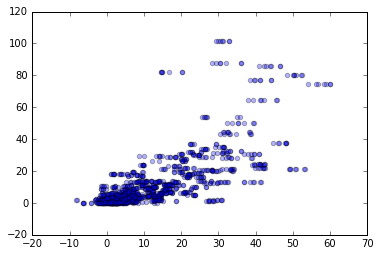

In [91]:
# and lol remember that dictionaries are NOT ordered
for name,model in models.iteritems():
    model.fit(movie_features_train,movie_target_train)
    print('Model: '+name)
    preds = model.predict(movie_features_test)
    plt.scatter(preds,movie_target_test, alpha=0.3)
    plt.show
    print('Score: ' + str(model.score(movie_features_test,movie_target_test)))
    preds = model.predict(movie_features_test)
#     plt.scatter(preds,movie_target_test, alpha=0.3)
#     plt.show

# want to see the effect of normalizing and different parameters
# np.logspace selects numbers evenly from -4 to -0.1 (on log scale, goes from 10^4 to 10^0.1)

In [92]:
lassoCV = linear_model.LassoCV()
lassoCV.fit(movie_features_train,movie_target_train)
preds = lassoCV.predict(movie_features_test)
# plt.scatter(preds,movie_target_test,alpha=0.3)
print "lassoCV score: ", lassoCV.score(movie_features_test,movie_target_test)
scores = cross_val_score(lassoCV,movie_features_train,movie_target_train)
print "lassoCV cross val scores: ",scores
print "mean lassoCV cross val scores: ",np.mean(scores)
print "holdout performance: ", lassoCV.score(movie_features_holdout,movie_target_holdout)

lassoCV score:  0.524461949277
lassoCV cross val scores:  [ 0.53968561  0.55446495  0.57482473]
mean lassoCV cross val scores:  0.556325099064
holdout performance:  0.678834824212


In [168]:
lasso = linear_model.Lasso()

parameters = {'normalize':(True,False),'alpha':np.logspace(-4,-.1,30)}
grid_searcher = grid_search.GridSearchCV(lasso,parameters)
grid_searcher.fit(movie_features_train,movie_target_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': (True, False), 'alpha': array([  1.00000e-04,   1.36296e-04,   1.85766e-04,   2.53191e-04,
         3.45089e-04,   4.70342e-04,   6.41057e-04,   8.73734e-04,
         1.19086e-03,   1.62310e-03,   2.21222e-03,   3.01516e-03,
         4.10954e-03,   5.60113e-03,   7.63411e-03...    1.68883e-01,   2.30181e-01,   3.13727e-01,   4.27597e-01,
         5.82797e-01,   7.94328e-01])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [169]:
grid_searcher.best_params_

{'alpha': 0.048939009184774888, 'normalize': True}

In [170]:
best_lasso_model = grid_searcher.best_estimator_

In [171]:
best_lasso_model.score(movie_features_test,movie_target_test)

0.53255596290336582

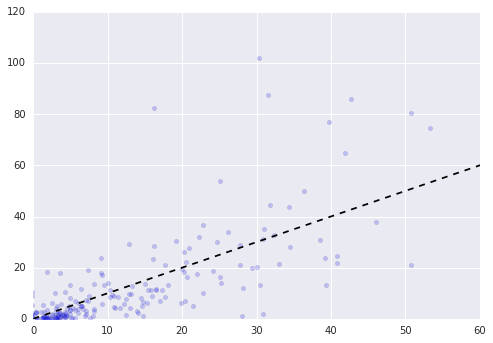

In [172]:
temp = np.linspace(0,600000000,7000)

preds = best_lasso_model.predict(movie_features_test)
plt.scatter(preds,movie_target_test,alpha=0.2)
plt.xlim(0)
plt.ylim(0)
plt.plot(temp,temp,'k--')

In [173]:
import seaborn as sns

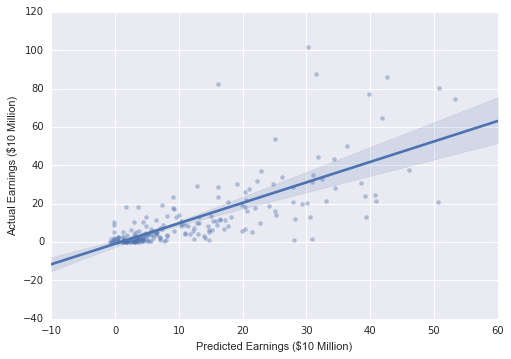

In [174]:

sns.regplot(preds,movie_target_test,scatter_kws={'alpha':0.4})
sns.axlabel('Predicted Earnings ($10 Million)', 'Actual Earnings ($10 Million)')
# f.set_size_inches(10,10)
# sns.yaxis.set_major_locator(10)
# sns.xlim(0)
# sns.ylim(0)

In [175]:
sorted_features = sorted(zip(movie_features_train,model.coef_),
                         key=lambda tup: abs(tup[1]),reverse=True) 
# reverse makes it go from positive to negative...doesnt mean importance though~~~~~!!!!!
for feature in sorted_features:
    print(feature)
print # get some spacing

('BUDGET', 1.9315889428445636)
('ACTOR_EXP', 0.065630490951637865)
('PRODUCER_EXP', 0.0013299517722934495)
('Action', 0.0)
('Adventure', 0.0)
('Animation', 0.0)
('Comedy', -0.0)
('Concert', 0.0)
('Crime', -0.0)
('DIRECTOR_EXP', 0.0)
('Documentary', 0.0)
('Drama', -0.0)
('Family', 0.0)
('Fantasy', 0.0)
('Foreign', 0.0)
('Historical', 0.0)
('Horror', 0.0)
('IMAX', 0.0)
('Music', 0.0)
('Musical', -0.0)
('Period', -0.0)
('Romance', 0.0)
('Romantic', -0.0)
('Sci-Fi', 0.0)
('Sports', -0.0)
('Thriller', -0.0)
('WRITER_EXP', 0.0)
('War', -0.0)
('Western', -0.0)
('RELEASE_QUARTER_1', -0.0)
('RELEASE_QUARTER_2', 0.0)
('RELEASE_QUARTER_3', 0.0)
('RELEASE_QUARTER_4', 0.0)



In [128]:
scores = cross_val_score(best_lasso_model, movie_features_train,movie_target_train,cv=kfold)

In [129]:
print ("scores: ",scores)
print "avg score: ", np.mean(scores)

('scores: ', array([ 0.65329831,  0.48137696,  0.45802107,  0.71397138,  0.36038698,
       -0.00335373,  0.70806757,  0.53837412,  0.47783613,  0.54723437]))
avg score:  0.493521316324


In [130]:
best_lasso_model.score(movie_features_holdout,movie_target_holdout)

0.57373305449398626

# Doing the actor/director/producer/writer experience thing bumped my scores for lin reg up ~10%

# Gradient Boosting

# Things to ask:
* Gridsearch with gradient boosting?
* Gridsearch with random forests